## Import Python packages 

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
import pickle

## Load transformed testing data 

In [2]:
# load test data 
X_test_combined_B_am = loadtxt('X_test_combined_comb_am.csv', delimiter=',')
y_test_combined_B_am = loadtxt('y_test_combined_comb_am.csv', delimiter=',')

## Import model

In [3]:
# Load model 
filename = 'Combined_allangles_am_best_cat.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Get test set predictions and give evaluation metrics

In [4]:
y_pred_test = loaded_model.predict(X_test_combined_B_am)

mape = mean_absolute_percentage_error(y_test_combined_B_am,y_pred_test)
mae = mean_absolute_error(y_test_combined_B_am,y_pred_test)
r2 = r2_score(y_test_combined_B_am,y_pred_test)

print("MAPE:", mape)
print("===")
print("MAE:", mae)
print("===")
print("R2:", r2)

MAPE: 0.1585738523606745
===
MAE: 0.047636614523832985
===
R2: 0.9676351403113923


## Produce error histogram

C:\Users\phy3jenkid\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


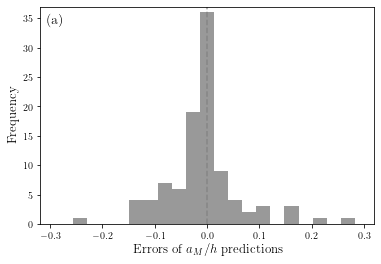

In [5]:
residuals = y_test_combined_B_am - y_pred_test 

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'

fig, ax = plt.subplots()
sns.distplot(residuals, bins = 20, hist=True,kde=False,color="k") # you may select the no. of bins
x_thing = np.zeros((100,1))
y_thing = np.linspace(0,40,100)
plt.xlim([-0.32,0.32])
plt.ylim([0,37])
#plt.title('Error Terms', fontsize=20)     

plt.xlabel(r'Errors of $a_{M} / h$ predictions', fontsize = 13) # r'Observed $a_{M} / h $'
plt.ylabel('Frequency', fontsize = 13)

ax.plot(x_thing, y_thing, "--", alpha=0.75,color="grey")
matplotlib.pyplot.text(0.0225,0.97,"(a)",
                       horizontalalignment='left', verticalalignment='top', fontsize=14, transform = ax.transAxes)
#plt.savefig("error_hist_amp.jpg", dpi=1200,bbox_inches="tight")
plt.show()

## Create predicted versus observed plot

In [6]:
def make_QQ_pred_FWU(X_test_combined,y_test_combined,predictions_combined_grid_search):
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'DeJavu Serif'
    fig, ax = plt.subplots()
    
    plt.rcParams['text.usetex'] = True # "font.family": "Helvetica"
    #plt.rcParams['mathtext.fontset'] = 'cm'
    plt.xlabel(r'Observed $a_{M} / h $', fontsize=13)
    plt.ylabel(r'Predicted $ a_{M} / h$', fontsize=13)
    
    plt.xlim([0,2.7])
    plt.ylim([0,2.7])
    
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(13)  
    max_val = float(np.amax(y_test_combined))
    O = np.linspace(0,max_val + 0.5,1000)
    plt.plot(O,O, color = 'k')
    
    count_gran = 0
    count_2dsolid = 0
    count_3dsolid = 0
    
   
            
    for i in range(X_test_combined.shape[0]):    #[F,S,M,(2or3),solid/gran (gran = 0, solid = 1),prop angle]
        if X_test_combined[i,4] == 0: 
            count_gran += 1 
        elif X_test_combined[i,3] == 0 and X_test_combined[i,4] == 1:
            count_2dsolid += 1 
        elif X_test_combined[i,3] == 1:
            count_3dsolid += 1 
          
            

        
    print(count_gran,count_2dsolid,count_3dsolid)
    
    ys_count_gran = np.zeros((count_gran,1))
    ys_count_gran_preds = np.zeros((count_gran,1))
    
    ys_count_2dsolid = np.zeros((count_2dsolid,1))
    ys_count_2dsolid_preds = np.zeros((count_2dsolid,1))
    
    ys_count_3dsolid = np.zeros((count_3dsolid,1))
    ys_count_3dsolid_preds = np.zeros((count_3dsolid,1))
    


    count_gran_c = 0
    count_2dsolid_c = 0
    count_3dsolid_c = 0
        
    for i in range(X_test_combined.shape[0]):    #[F,S,M,(2or3),solid/gran,prop angle]
        if X_test_combined[i,4] == 0: 
            ys_count_gran[count_gran_c] = y_test_combined[i]
            ys_count_gran_preds[count_gran_c] = predictions_combined_grid_search[i]
            count_gran_c += 1
        elif X_test_combined[i,3] == 0 and X_test_combined[i,4] == 1:
            ys_count_2dsolid[count_2dsolid_c] = y_test_combined[i]
            ys_count_2dsolid_preds[count_2dsolid_c] = predictions_combined_grid_search[i]
            count_2dsolid_c += 1 
        elif X_test_combined[i,3] == 1 and X_test_combined[i,4] == 1:
            ys_count_3dsolid[count_3dsolid_c] = y_test_combined[i]
            ys_count_3dsolid_preds[count_3dsolid_c] = predictions_combined_grid_search[i]
            count_3dsolid_c += 1 
    
    print(ys_count_gran.shape,ys_count_2dsolid, ys_count_3dsolid.shape)
    
    ax.plot(ys_count_gran , ys_count_gran_preds, "x", color = 'dimgray' , label = '2D granular slides')
    ax.plot(ys_count_2dsolid , ys_count_2dsolid_preds, ".", color = 'dimgray' , label = '2D block slides')
    ax.plot(ys_count_3dsolid ,ys_count_3dsolid_preds, "^", color = 'dimgray' , label = '3D block slides')
    
    matplotlib.pyplot.text(0.0225,0.97,"(a)", horizontalalignment='left', verticalalignment='top', fontsize=13, transform = ax.transAxes)
    ax.legend(fontsize=13, loc="lower right",facecolor='lightgrey')
    #plt.savefig("13combpaper_newer_a.jpg", dpi=1200,bbox_inches="tight")
    plt.show()

43 35 22
(43, 1) [[0.15541667]
 [0.146875  ]
 [0.14604167]
 [0.65083333]
 [0.113125  ]
 [0.53      ]
 [0.10683333]
 [0.40966667]
 [0.14933333]
 [0.407     ]
 [0.11266667]
 [0.14966667]
 [0.13183333]
 [0.284     ]
 [0.30466667]
 [0.103     ]
 [0.1005    ]
 [0.10666667]
 [0.23433333]
 [0.0965    ]
 [0.42533333]
 [0.138     ]
 [0.42333333]
 [0.17783333]
 [0.09866667]
 [0.13383333]
 [0.10083333]
 [0.09866667]
 [0.435     ]
 [0.32766667]
 [0.134     ]
 [0.13366667]
 [0.253     ]
 [0.34233333]
 [0.11933333]] (22, 1)


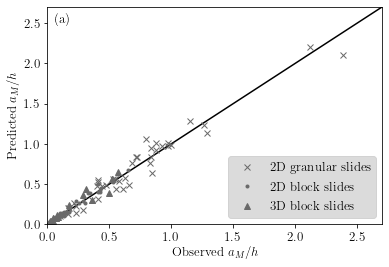

In [7]:
make_QQ_pred_FWU(X_test_combined_B_am ,y_test_combined_B_am,y_pred_test)